<a href="https://colab.research.google.com/github/Dileka9957/ML-Assignment/blob/IT20649708/SVM_it20649708.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# **Load the Data Set**

In [41]:
# Step 1: Fetching the Dataset
# Assuming you have downloaded the dataset and saved it as "kidney_disease.csv" in your working directory

# Step 2: Initial Exploration
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv("kidney_disease.csv")

In [42]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())



Missing values in the dataset:
id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Basic statistics of the dataset:
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.00

In [44]:
# Display the attributes and their data types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [45]:
# Get the shape of the dataset (number of rows and columns)
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Describe the dataset
print("Context: The dataset contains various attributes related to patients with chronic kidney disease.")
print("It consists of both numerical and categorical features.")
print("Attributes include age, blood pressure (bp), specific gravity (sg), albumin (al), sugar (su), red blood cells (rbc), pus cell (pc), etc.")
print("The dataset has", num_cols, "attributes and the target variable is 'classification'.")


Number of rows: 400
Number of columns: 26
Context: The dataset contains various attributes related to patients with chronic kidney disease.
It consists of both numerical and categorical features.
Attributes include age, blood pressure (bp), specific gravity (sg), albumin (al), sugar (su), red blood cells (rbc), pus cell (pc), etc.
The dataset has 26 attributes and the target variable is 'classification'.


In [46]:
# Display summary statistics for numerical attributes
print(data.describe())


               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006 

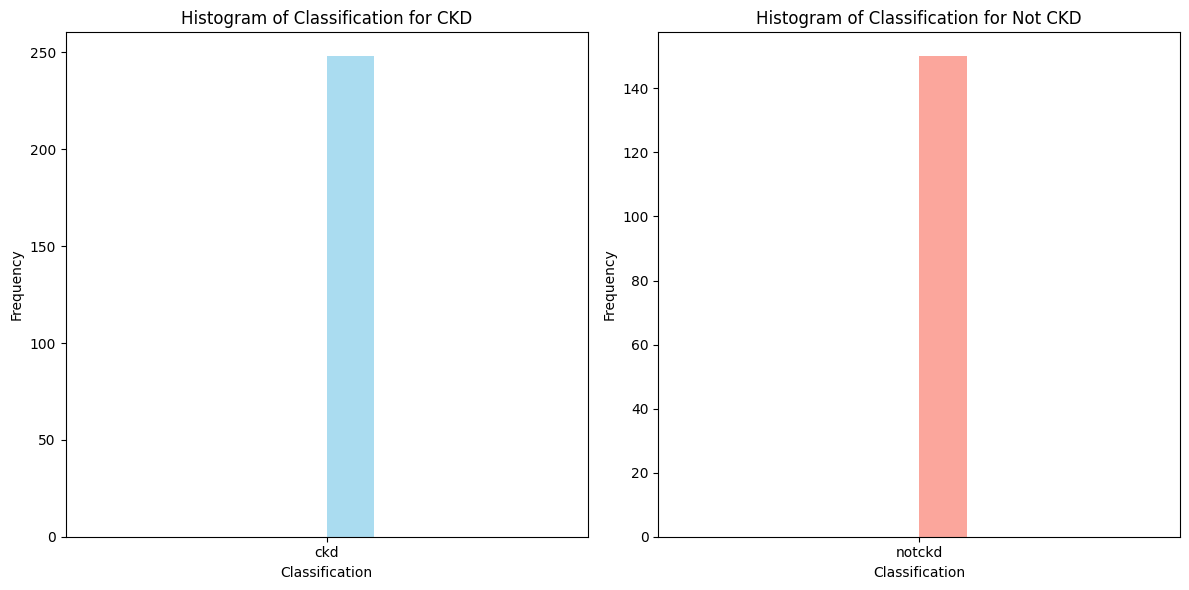

In [47]:
# Assuming you have loaded your dataset into a DataFrame named 'df'
# Replace 'df' with your actual DataFrame if different

# Separate the dataset into 'ckd' and 'notckd' classes
ckd_data = data[data['classification'] == 'ckd']
notckd_data = data[data['classification'] == 'notckd']

# Plot histograms for each class
plt.figure(figsize=(12, 6))

# Histogram for 'ckd' class
plt.subplot(1, 2, 1)
plt.hist(ckd_data['classification'], color='skyblue', alpha=0.7)
plt.title('Histogram of Classification for CKD')
plt.xlabel('Classification')
plt.ylabel('Frequency')

# Histogram for 'notckd' class
plt.subplot(1, 2, 2)
plt.hist(notckd_data['classification'], color='salmon', alpha=0.7)
plt.title('Histogram of Classification for Not CKD')
plt.xlabel('Classification')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Data PreProcessing**

In [48]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Create an imputer object with strategy='mean' to impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values for numerical columns
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[num_columns] = imputer.fit_transform(data[num_columns])

# Impute missing values for categorical columns (if any)
cat_columns = data.select_dtypes(include=['object']).columns
for col in cat_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


Missing values:
 id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [49]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=cat_columns)


In [50]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Scale numerical features
data_scaled = scaler.fit_transform(data_encoded[num_columns])

# Replace original numerical columns with scaled values
data_encoded[num_columns] = data_scaled


# **Model Eveluation**

In [51]:
# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop(columns=['classification_ckd', 'classification_ckd\t', 'classification_notckd'], axis=1)
y = data_encoded['classification_ckd']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # Use linear kernel for better interpretability

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.975


In [52]:
# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.97        28
        True       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



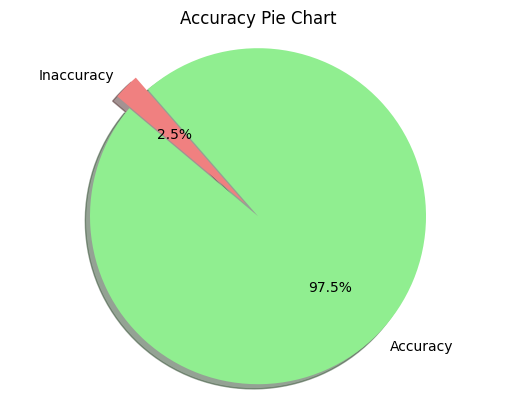

In [53]:
# Calculate the accuracy and the inverse of the accuracy
accuracy_value = accuracy_score(y_test, y_pred)
inaccuracy_value = 1 - accuracy_value

# Plot the pie chart
labels = ['Accuracy', 'Inaccuracy']
sizes = [accuracy_value, inaccuracy_value]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (Accuracy)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Accuracy Pie Chart')
plt.show()


# **Test Results**

In [34]:
# Compare predicted labels with actual labels
correct_predictions = (y_pred == y_test)

# Print the indices of incorrect predictions
incorrect_indices = [i for i, correct in enumerate(correct_predictions) if not correct]
print("Indices of incorrect predictions:", incorrect_indices)

# Print the actual and predicted labels for incorrect predictions
print("Incorrect predictions:")
for index in incorrect_indices:
    print("Actual:", y_test.iloc[index], "\tPredicted:", y_pred[index])


Indices of incorrect predictions: [0, 47]
Incorrect predictions:
Actual: True 	Predicted: False
Actual: True 	Predicted: False


In [35]:
# Compare predicted labels with actual labels
correct_predictions = (y_pred == y_test)

# Print the indices of correct predictions
correct_indices = [i for i, correct in enumerate(correct_predictions) if correct]
print("Indices of correct predictions:", correct_indices)

# Print the actual and predicted labels for correct predictions
print("Correct predictions:")
for index in correct_indices:
    print("Actual:", y_test.iloc[index], "\tPredicted:", y_pred[index])


Indices of correct predictions: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Correct predictions:
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True